<a href="https://colab.research.google.com/github/sallamdarsh-ux/ANN-Project/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/updated_version.csv')

In [ ]:
df.head()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0


| العمود                | المعنى                   | النوع          | التوضيح                                             |
| --------------------- | ------------------------ | -------------- | --------------------------------------------------- |
| **age**               | العمر                    | عددي           | عمر الشخص بالسنوات                                  |
| **sex**               | الجنس                    | ثنائي (0 أو 1) | غالبًا 0 = أنثى، 1 = ذكر                            |
| **total_cholesterol** | الكوليسترول الكلي        | عددي           | كمية الكوليسترول الإجمالية في الدم                  |
| **ldl**               | الكوليسترول الضار (LDL)  | عددي           | يمثل نوع الكوليسترول المرتبط بزيادة خطر أمراض القلب |
| **hdl**               | الكوليسترول النافع (HDL) | عددي           | نوع الكوليسترول المفيد الذي يقلل خطر الإصابة        |
| **systolic_bp**       | ضغط الدم الانقباضي       | عددي           | أعلى رقم في قراءة ضغط الدم                          |
| **diastolic_bp**      | ضغط الدم الانبساطي       | عددي           | أقل رقم في قراءة ضغط الدم                           |
| **smoking**           | التدخين                  | ثنائي (0 أو 1) | 1 = مدخن، 0 = غير مدخن                              |
| **diabetes**          | السكري                   | ثنائي (0 أو 1) | 1 = مصاب بالسكري، 0 = غير مصاب                      |
| **heart_attack**      | النوبة القلبية           | الهدف (Target) | 1 = حدثت نوبة قلبية، 0 = لم تحدث                    |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

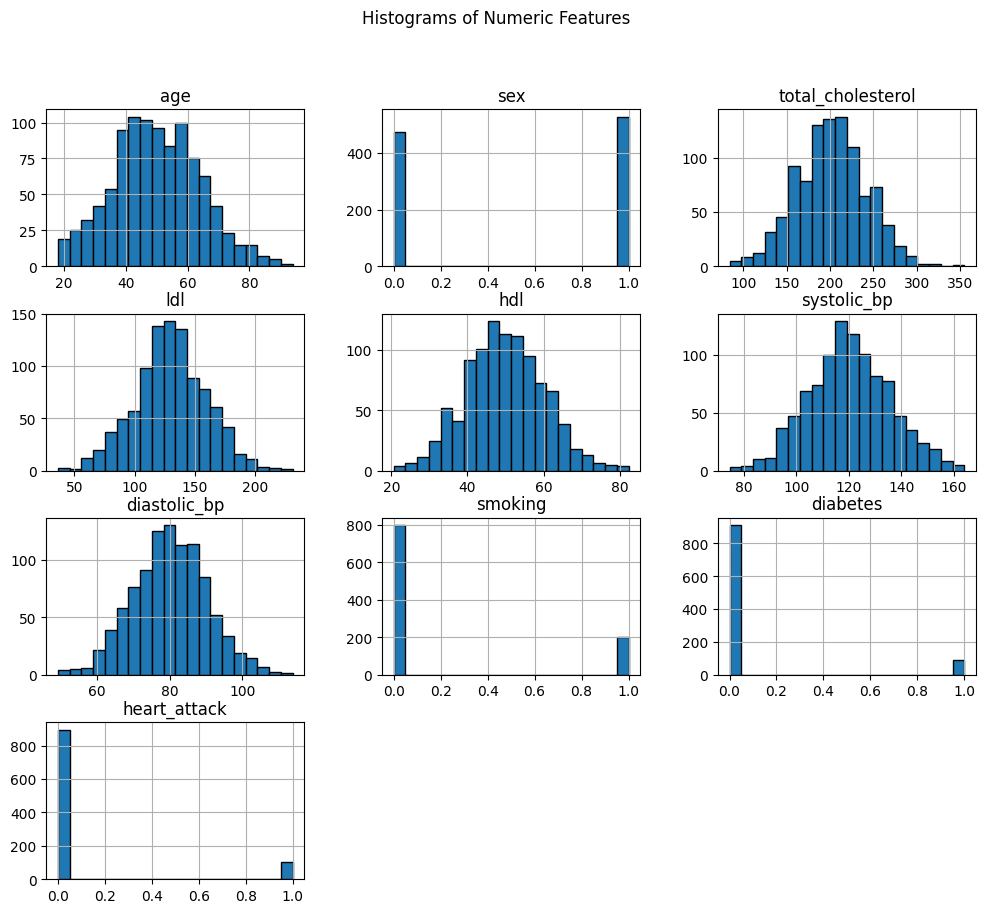

In [ ]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()

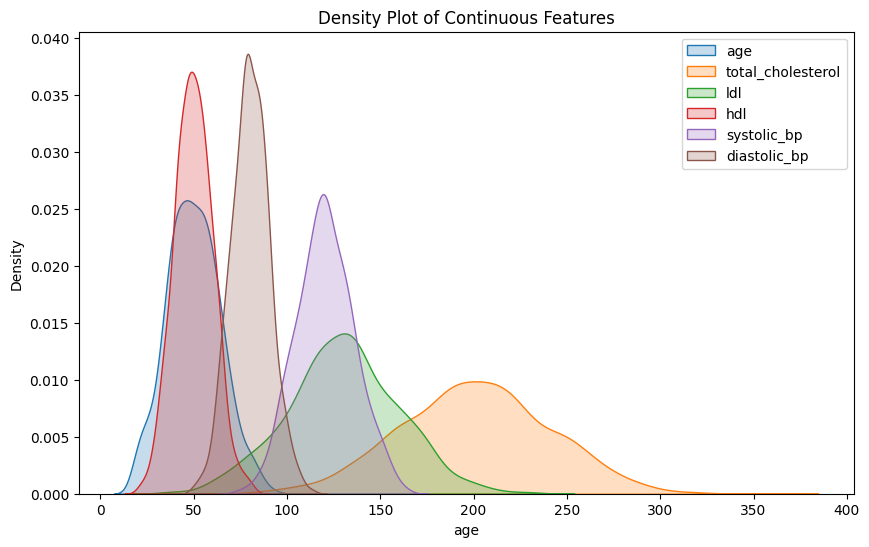

In [ ]:
plt.figure(figsize=(10,6))
for column in ['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']:
    sns.kdeplot(df[column], label=column, fill=True)
plt.legend()
plt.title("Density Plot of Continuous Features")
plt.show()

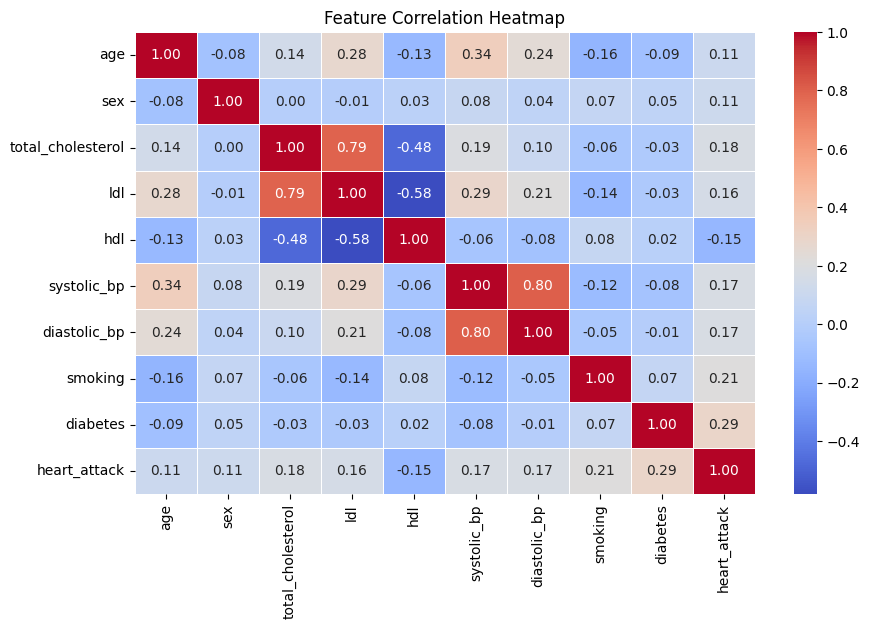

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.shape

(1000, 10)

In [ ]:
#split data to x&y
X = df.iloc[:, 0:9]
y = df.iloc[:, 9]


In [ ]:
X

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1
...,...,...,...,...,...,...,...,...,...
995,65,1,195.336429,149.070951,43.914928,132.878440,86.246414,0,0
996,60,1,192.342928,134.357395,53.380714,145.149535,91.069141,0,0
997,70,0,174.179319,125.900047,50.406918,133.022878,85.851330,0,0
998,48,0,189.715685,152.388737,40.700912,113.527965,86.368294,0,0


In [ ]:
y

,heart_attack
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [ ]:
df.describe()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.886000,0.52700,201.087486,130.047807,49.811244,120.312687,80.231248,0.202000,0.090000,0.104000
std,14.209466,0.49952,40.042655,30.041659,10.247178,15.507493,10.235917,0.401693,0.286325,0.305413
min,18.000000,0.00000,84.165932,36.259745,20.600644,74.433950,49.296305,0.000000,0.000000,0.000000
25%,40.000000,0.00000,174.707208,111.963197,42.622102,110.062952,73.277119,0.000000,0.000000,0.000000
50%,49.000000,1.00000,201.191547,130.678540,49.682809,120.042175,79.912592,0.000000,0.000000,0.000000
75%,59.000000,1.00000,226.251708,149.732446,56.703598,130.911804,87.084443,0.000000,0.000000,0.000000
max,94.000000,1.00000,354.660015,231.376631,82.319810,164.080967,113.848127,1.000000,1.000000,1.000000


In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(900, 9)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# لو y فيها قيم 0 و1 بنحوّلها لصيغة one-hot للـ softmax
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

classifier = Sequential()

# Input + Hidden layers
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=9))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

# Output layer with SOFTMAX
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='softmax'))

# Compile model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = classifier.fit(X_train, y_train_cat, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8343 - loss: 0.6819 - val_accuracy: 0.8833 - val_loss: 0.6369
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8659 - loss: 0.5976 - val_accuracy: 0.8833 - val_loss: 0.4024
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9142 - loss: 0.3183 - val_accuracy: 0.8833 - val_loss: 0.3071
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8902 - loss: 0.2763 - val_accuracy: 0.8833 - val_loss: 0.2944
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8987 - loss: 0.2678 - val_accuracy: 0.8833 - val_loss: 0.2844
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9049 - loss: 0.2567 - val_accuracy: 0.8833 - val_loss: 0.2778
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8990 - loss: 0.2420 - val_accuracy: 0.8833 - val_loss: 0.2750
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9022 - loss: 0.2345 - val_accuracy: 0.8833 - val_loss: 0.

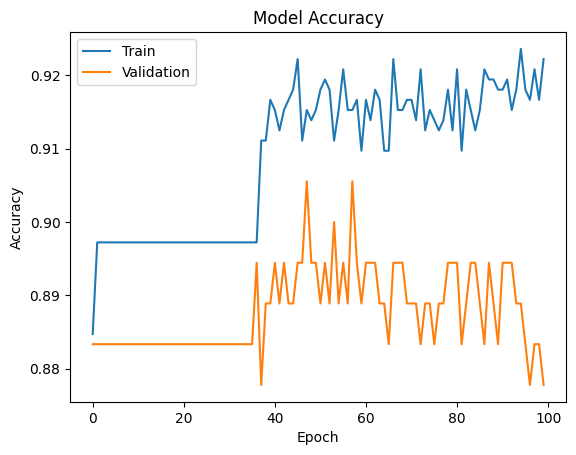

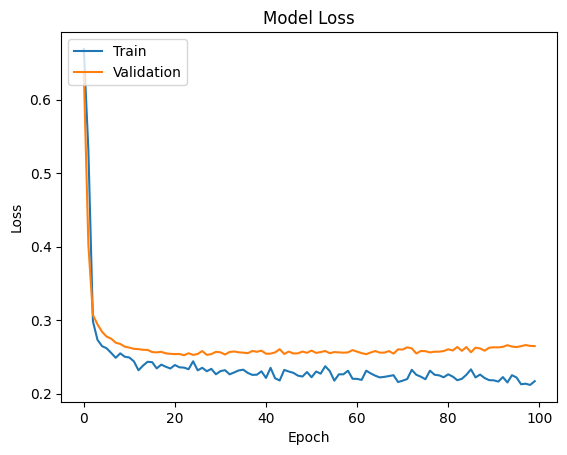

In [ ]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy']) # Access history from the 'history' object
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss']) # Access history from the 'history' object
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#  softmax output
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)
print(classification_report(y_true, y_pred_classes, digits=4))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0     0.9271    0.9780    0.9519        91
           1     0.5000    0.2222    0.3077         9

    accuracy                         0.9100       100
   macro avg     0.7135    0.6001    0.6298       100
weighted avg     0.8886    0.9100    0.8939       100

